In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from contagion.utils import get_rho_MF, parse_results
from directories import contagion_results_dir

%matplotlib inline


## Plotting

### Simplagion Contagion Model of order 2

In [2]:
database = 'scholp'
dataset = 'tags-math-sx'
version = 1 # either 0 (old), 1 or 2 (with stationary sigma)

filename = f'{dataset}_lambda_slices.pickle' if version is 0 else f'{dataset} - lambda_slices.pickle'
results_dir = os.path.join(contagion_results_dir, database)
if not os.path.exists(results_dir):
    raise Exception(f'{results_dir} not found')

filepath = os.path.join(results_dir, filename)

results = any
with open(filepath, "rb") as file_handler:
  results = pickle.load(file_handler)

if version is 0:
  rhos, stationary_rhos, k, k_delta, lambdas, rho0s_per_lambda_delta, mu = results  
elif version is 1:
  rhos, stationary_rhos, k, k_delta, lambdas, rho0s_per_lambda_delta, mu = parse_results(results)
else:
  rhos, stationary_rhos, k, k_delta, lambdas, sigma, sigma_delta, rho0s_per_lambda_delta, mu = parse_results(results)

print('rhos_per_lambda_delta: ' + str(rho0s_per_lambda_delta))
print('lambdas: ' + str(lambdas))


rhos_per_lambda_delta: {0: [0.01], 0.8: [0.01], 2.5: [0.01, 0.4]}
lambdas: [0.2, 0.5, 0.8, 1.0999999999999999, 1.4, 1.7, 1.9999999999999998, 2.3000000000000003, 2.6, 2.9]


In [3]:
# Select rho_0s per lambda delta to plot
rho0s_per_lambda_delta = {0: [0.01], 0.8: [0.01], 2.5: [0.01, 0.4]}

/mnt/data/Telematica/SimplicialNetworkScience/python/contagion/utils.py:87: RuntimeWarning: invalid value encountered in double_scalars
  rho1 = (lD-l + np.sqrt(in_sqrt))/(2*lD)


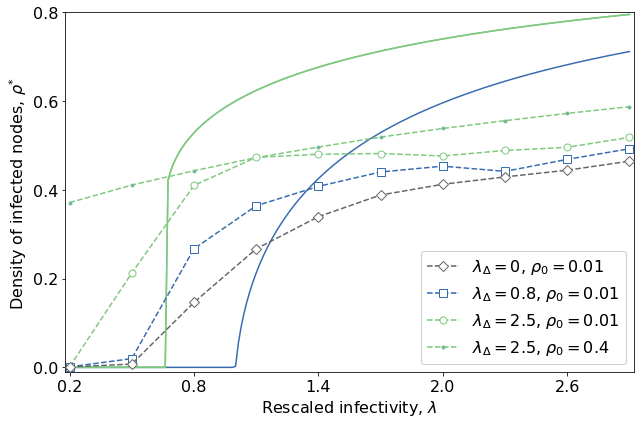

In [4]:
fig = plt.figure(figsize=(9, 6))
# plt.rcParams['xtick.major.width'] = 1.2
# plt.rcParams['ytick.major.width'] = 1.2
# plt.rcParams['axes.linewidth'] = 1.2

markers = ['D', 's', 'o', '.']
zorders = [8, 7, 6, 5]
mfcs = ['white', 'white', 'white', 'cornflowerblue']
markersizes = [7.5, 7.5, 7, 6]
colormap = plt.cm.get_cmap('Accent')
colors_list = list(colormap(np.linspace(0, 1, len(rho0s_per_lambda_delta.keys()))))
colors_dict = {}
for lambda_delta in rho0s_per_lambda_delta.keys():
    colors_dict[lambda_delta] = colors_list.pop()

ax = plt.subplot(111)

# Preparing MF
MF_x = np.linspace(lambdas[0], lambdas[-1], 200)

MF_y_dict = {}

for lambda_delta in rho0s_per_lambda_delta.keys():
    MF_y = list(map(lambda xx: get_rho_MF(xx, lambda_delta), MF_x))
    MF_y_dict[lambda_delta] = MF_y

i = 0
for lambda_delta, rho_0s in rho0s_per_lambda_delta.items():
    for initial_infected_rate in rho_0s:
        avg_stationary_rhos = np.mean(np.array([stationary_rhos[lambda_delta][initial_infected_rate][lambda1] for lambda1 in lambdas]), axis=1)
        label = f'$\\lambda_\\Delta={lambda_delta}$, $\\rho_0={initial_infected_rate}$'
        ax.plot(lambdas, avg_stationary_rhos, markers[i], color=colors_dict[lambda_delta], zorder=zorders[i], ls='dashed',
                mfc=mfcs[i], markersize=markersizes[i], label=label)

        if (lambda_delta != 0):  # MF has no sense for lambda_delta=0
            ax.plot(MF_x, MF_y_dict[lambda_delta], '-',
                    markersize=2, color=colors_dict[lambda_delta], lw=1.5)
        
        i += 1

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel(r'Rescaled infectivity, $\lambda$', size=16)
ax.set_ylabel(r'Density of infected nodes, $\rho^{*}$', size=16)
ax.set_xlim(lambdas[0] - .02, lambdas[-1] + .02)
# Print every two lambdas in the x-axis
ax.set_xticks([lambda1 for i, lambda1 in enumerate(lambdas) if i % 2 == 0])
ax.set_ylim(-0.01, 0.8)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

lgd = ax.legend(loc='best', fontsize=16)
ax.add_artist(lgd)

# ax.annotate('SIS', (2, 0.38), fontsize=13)

plt.tight_layout()


### Rho over time

In [5]:
# dataset = 'email-Enron'

filename = f'{dataset}_rhos_over_time.pickle' if old_version else f'{dataset} - rhos_over_time.pickle'
filepath = os.path.join(contagion_results_dir, filename)

results = any
with open(filepath, "rb") as file_handler:
  results = pickle.load(file_handler)

rhos, stationary_rhos, k, k_delta, lambdas, rho0s_per_lambda_delta, mu = parse_results(results) if old_version else results

print('rhos_per_lambda_delta: ' + str(rho0s_per_lambda_delta))
print('lambdas: ' + str(lambdas))

rhos_per_lambda_delta: {2.5: array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])}
lambdas: [0.75]


In [6]:
lambda1 = lambdas[0]
lambda_delta = list(rho0s_per_lambda_delta.keys())[0]

(0, 200)

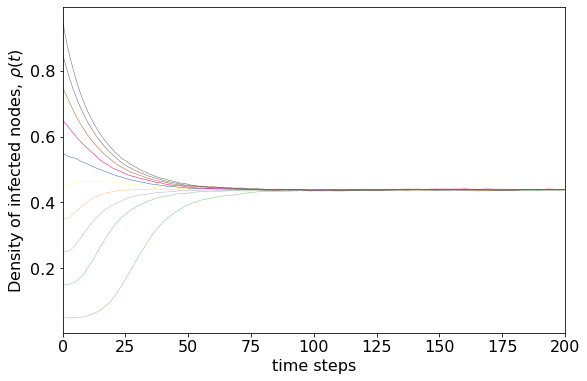

In [7]:
fig = plt.figure(figsize=(9, 6))
colors = list(colormap(np.linspace(0, 1, len(rhos[lambda_delta]))))
ax = plt.subplot(111)

avg_rhos = np.mean(np.array([rhos[lambda_delta][rho_0][lambda1] for rho_0 in rhos[lambda_delta].keys()]), axis=1)
x_axis = [timestep for timestep in range(0, avg_rhos.shape[1])]

for i, avg_rhos_per_rho_0 in enumerate(avg_rhos):
    # I take the lambda in the simultaion
    label = f'$\\rho_0={avg_rhos_per_rho_0[0]:.2f}$'
    
    ax.plot(x_axis, avg_rhos_per_rho_0, color=colors[i], ls='-', lw=.5, label=label)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel(r'time steps', size=16)
ax.set_ylabel(r'Density of infected nodes, $\rho(t)$', size=16)

ax.set_xlim(0, 200)
# ax.legend(loc='best', fontsize=16)
